In [5]:
!pip install -U tensorflow_decision_forests

In [6]:
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np

print("TF-DF version:", tfdf.__version__)

TF-DF version: 1.12.0


In [7]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.19.0
TensorFlow Decision Forests v1.12.0


In [8]:
train_file_path = "/kaggle/House_Prices/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


The data is composed of 81 columns and 1460 entries. We can see all 81 dimensions of our dataset by printing out the first 3 entries using the following code:

In [9]:
dataset_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


There are **79 feature columns**. Using these features your model has to **predict the house sale price** indicated by the label column named SalePrice.
We will **drop the Id column** as it is not necessary for model training.

In [10]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


We can inspect the types of feature columns using the following code:

In [11]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# House Price Distribution
Now let us take a look at **how the house prices are distributed.**

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-12-dc911a47893e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


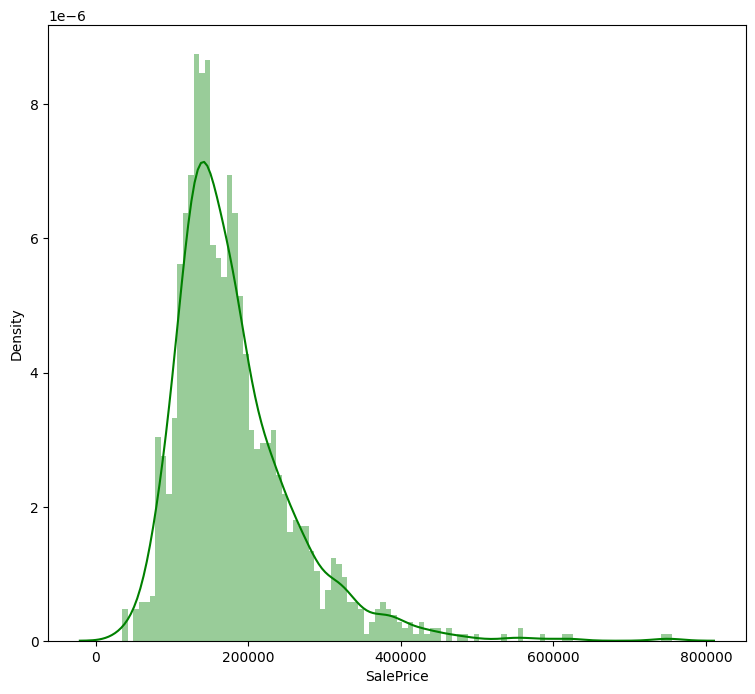

In [12]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

# Numerical data distribution
We will now take a look at **how the numerical features are distributed**. In order to do this, let us first list all the types of data from our dataset and **select only the numerical ones**.

In [13]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

**🔍 Step-by-step breakdown**

1 dataset_df.dtypes
- Returns the data types (dtype) of each column in the DataFrame dataset_df.
- Output: a Series where keys are column names and values are data types (e.g., int64, float64, object).

2 .tolist()

- Converts the Series of dtypes into a Python list of data types.
- Example: [int64, float64, object, int64, object]

3 set(...)
- **Removes duplicates** by converting the list into a set (which is unordered and contains only unique elements).
- Example: {int64, float64, object}

4 list(...)

- Converts the set back into a list, resulting in a list of unique data types in the DataFrame.

**✅ Function**
- List-Set-List
- Get the list of **unique data types** in the DataFrame dataset_df.

In [14]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Through this step, we only select the numerical values in the DataFrame because we will inspect the numerical features.

Now let us plot the distribution for all the numerical features.

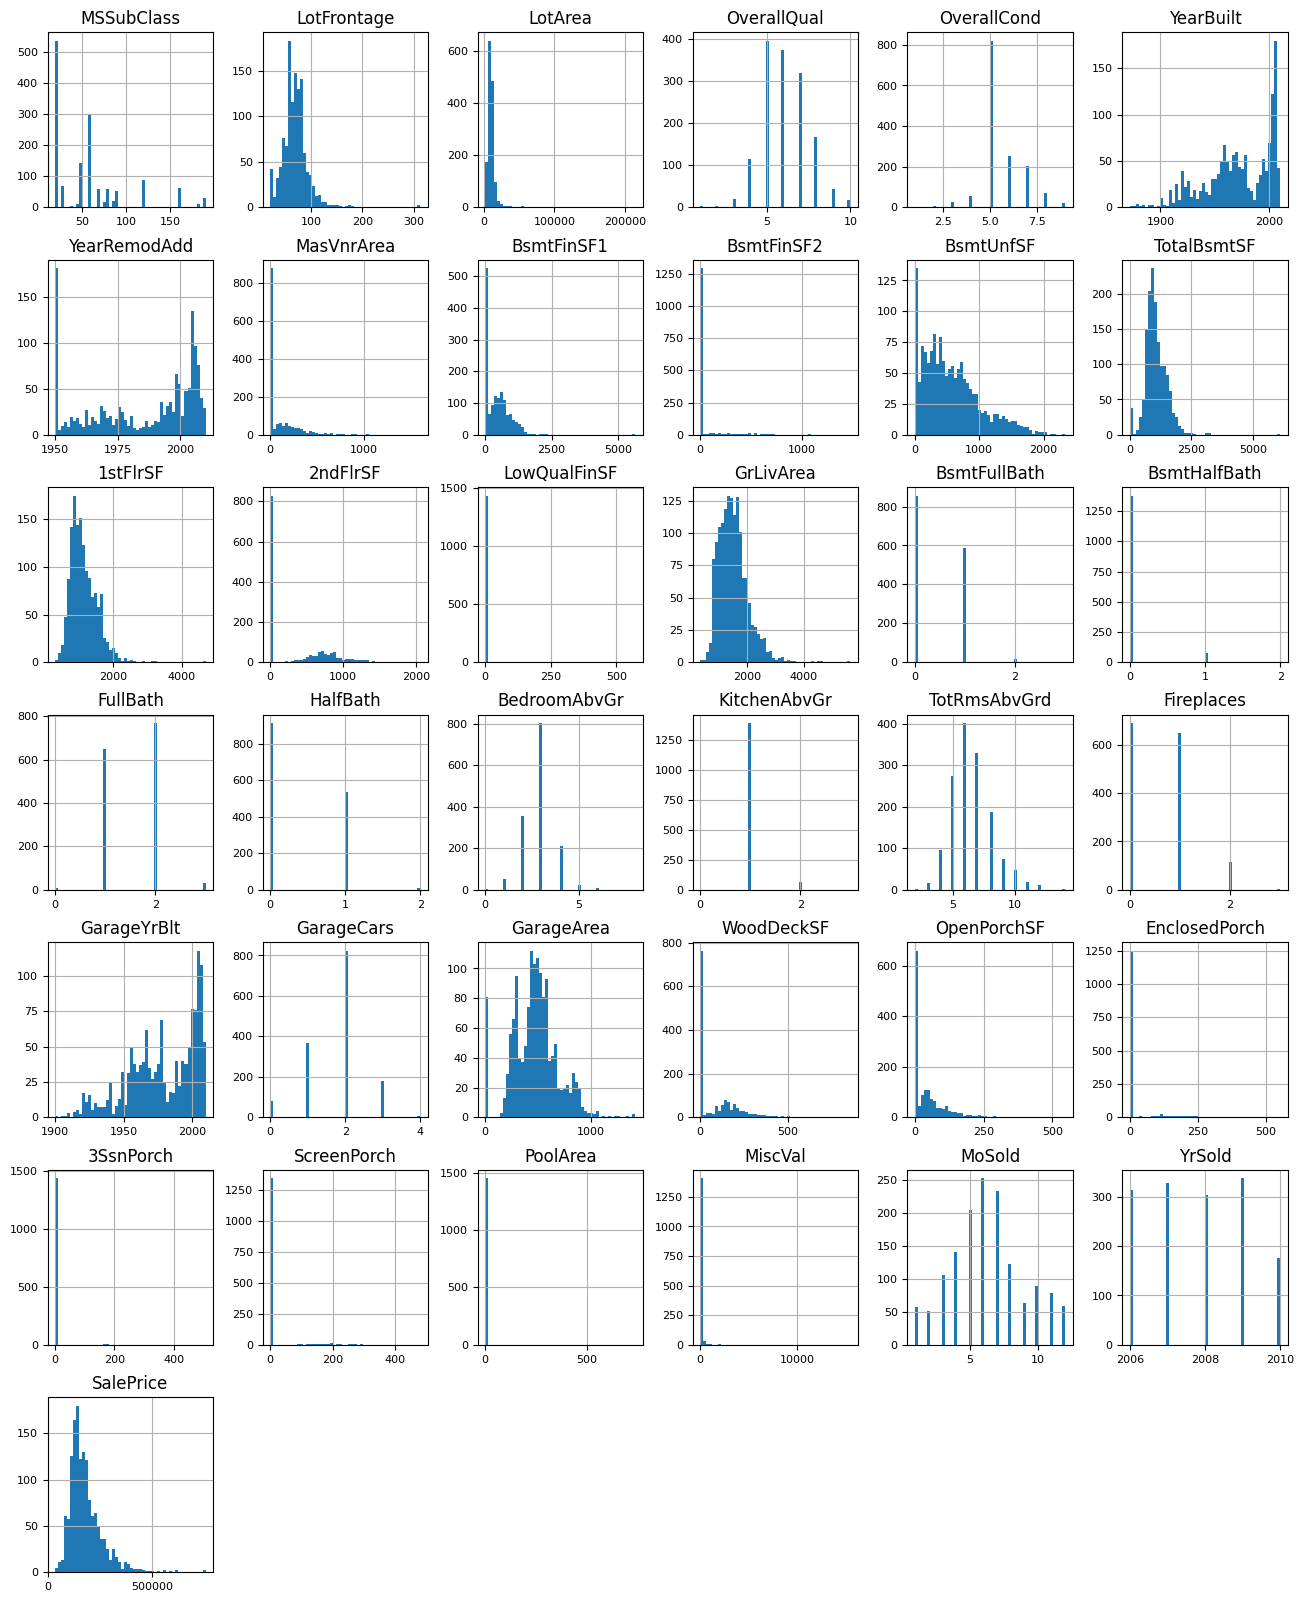

In [15]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Prepare the dataset

This dataset contains **a mix of numeric, categorical and missing features**. **TF-DF** supports all these feature types natively, and no preprocessing is required. This is one advantage of **tree-based models**, making them a great entry point to Tensorflow and ML.

Now let us split the dataset into training and testing datasets:

In [16]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1002 examples in training, 458 examples in testing.


**🔹 def split_dataset(dataset, test_ratio=0.30)**
- This defines a function named split_dataset.It takes two arguments:
  - dataset: a Pandas DataFrame (like dataset_df).
  - test_ratio: the proportion of the dataset to be used for testing (default is 0.30, i.e., 30%).

**🔹 test_indices = np.random.rand(len(dataset)) < test_ratio**
**What this does:**
- np.random.rand(len(dataset)) generates a **1D array of random float numbers** between 0 and 1, one for each row of the dataset.
- Example: [0.12, 0.95, 0.03, 0.60] for a dataset of length 4.
- ... < test_ratio creates a **Boolean array**:
  - Each element is True if the random number is less than test_ratio, False otherwise.
  - If test_ratio=0.3, then roughly 30% of values will be True.

This array indicates which rows go to the **test set (where value is True)** and which to the **training set (where value is False).**


**🔹 return dataset[~test_indices], dataset[test_indices]**

- This returns a tuple of two datasets:

  - dataset[~test_indices]: the training set, where test_indices is False.

  ~test_indices negates the Boolean array.

  - dataset[test_indices]: the test (validation) set, where test_indices is True.
  - **Just image the pf structure as a chart, and the indices correspond to different rows**

So the function splits the dataset randomly into training and test sets.

**🔹 train_ds_pd, valid_ds_pd = split_dataset(dataset_df)**

- Calls the split_dataset function with the full dataset dataset_df.
- **train_ds_pd** will hold the training portion, and valid_ds_pd will hold the validation/test portion.

**🔹 print("{} examples in training, {} examples in testing.".format(len(train_ds_pd), len(valid_ds_pd)))**
- Outputs the number of samples in each split.
- len(train_ds_pd) returns number of rows in the training set.
- len(valid_ds_pd) returns number of rows in the test set.

**✅ Purpose of the Entire Code**

Randomly splits a dataset into a training set and a test/validation set, based on a given ratio, and prints the number of records in each set.

| Code                           | Function                                                  |
| ------------------------------ | --------------------------------------------------------- |
| `np.random.rand(len(dataset))` | Generates random floats for each row                      |
| `< test_ratio`                 | Creates Boolean mask to split data                        |
| `dataset[mask]`                | Selects rows based on the mask                            |
| `~mask`                        | Selects the complement (e.g., training if test is masked) |


There's one more step required before we can train the model. We need to convert the datatset **from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset)**.

**TensorFlow Datasets** is a high performance data loading library which is helpful when training neural networks with accelerators like GPUs and TPUs.

By default the **Random Forest** Model is configured to train classification tasks. Since **this is a regression problem**, we will specify the type of the task (tfdf.keras.Task.REGRESSION) as a parameter here.

In [17]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

- 默认情况下，**Random Forest 模型（在 TensorFlow Decision Forests 中）被设置为处理分类任务（Classification）**。
- 也就是说，如果你不特别指定，它会认为你的目标是**预测一个类别标签（如“猫”、“狗”或“0/1”）**。

- 但是，现在你的任务是一个**回归问题**（Regression）——比如预测房价、温度或销售额，**这些都是连续值而不是类别**。
- 所以你需要手动指定任务类型为回归，通过设置模型的 task 参数为：tfdf.keras.Task.REGRESSION

| 类型     | 参数                               | 说明             |
| ------ | -------------------------------- | -------------- |
| 分类（默认） | `tfdf.keras.Task.CLASSIFICATION` | 预测离散标签，如 “是/否” |
| 回归     | `tfdf.keras.Task.REGRESSION`     | 预测连续数值，如价格、分数  |



## Select a Model

There are several **tree-based models** for you to choose from.
- RandomForestModel
- GradientBoostedTreesModel
- CartModel
- DistributedGradientBoostedTreesModel

To start, we'll work with **a Random Forest**. This is the most well-known of **the Decision Forest training algorithms**.

**A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement)**. The algorithm is unique in that it is robust to overfitting, and easy to use.

We can list the all the available models in **TensorFlow Decision Forests** using the following code:

In [18]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

### How can I configure them?

**TensorFlow Decision Forests** provides good defaults for you (e.g. the top ranking hyperparameters on our benchmarks, slightly modified to run in reasonable time). If you would like to configure the learning algorithm, you will **find many options you can explore to get the highest possible accuracy**.

You can select a template and/or set parameters as follows:

```python
rf = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1", task=tfdf.keras.Task.REGRESSION)
```

Read more [here](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel).

## Create a Random Forest

Today, we will use the defaults to **create the Random Forest Model** while specifiyng the task type as **tfdf.keras.Task.REGRESSION**.

In [19]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpjl_rhxx0 as temporary training directory


## Train the model
We will train the model using a one-liner.

Note: you may see a warning about Autograph. You can safely ignore this, it will be fixed in the next release.

In [20]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.731399. Found 1002 examples.
Training model...
Model trained in 0:00:07.971021
Compiling model...
Model compiled.


## Visualize the model
One benefit of tree-based models is that you can **easily visualize them**. The default number of trees used in the Random Forests is 300. We can select a tree to display below.

In [21]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

- Before training the dataset, we have manually seperated 20% of the dataset for validation named as valid_ds.
- We can also use Out of bag (OOB) score to validate our RandomForestModel.
- To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

- The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Smaller values are better for this hyperparameter.

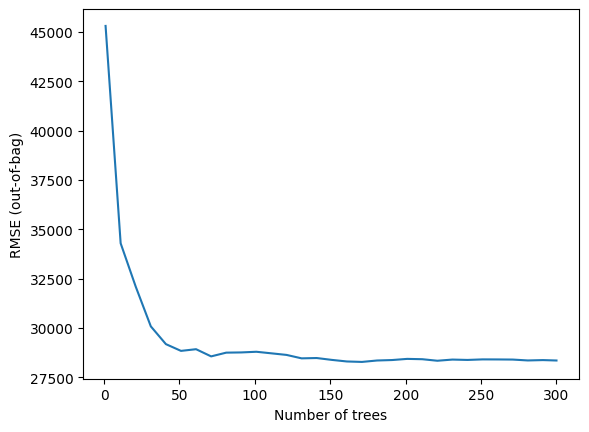

In [22]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

代码注解：
```python
logs = rf.make_inspector().training_logs()
```
- rf 是你训练好的 RandomForestModel 实例。
- make_inspector() 会创建一个模型的 Inspector 对象，用于分析训练过程和模型内部结构。
- .training_logs() 会返回一个**包含训练日志的列表**，每个日志记录了当前训练到了第几棵树，以及这时的评估指标。（在训练过程中，树的数量在逐渐增加）
```python
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
```
- log.num_trees: 当前已经训练了多少棵树。
- log.evaluation.rmse: 对应的袋外误差（Root Mean Squared Error，RMSE），也就是模型在未见过的样本上的表现。

这一行用来绘制：
- 指定横轴（X）：训练的树数量（模型复杂度）
- 指定纵轴（Y）：袋外RMSE（误差，越低越好）

**📈 这张图的意义**

- 趋势下降：随着树的数量增加，误差RMSE通常会逐渐减小，说明模型学习得更好。
- 趋势趋于平稳或上升：**表示继续添加树已经不再显著提升性能，甚至开始过拟合**。

**🧠 什么是“袋外误差（Out-of-Bag Error）”？**
- 在随机森林中，每棵树是通过对训练数据**有放回采样（bootstrap sampling）**生成的。
- 大约有 1/3 的数据没有用于训练任何一颗树，这些数据称为袋外数据（out-of-bag samples）。
- 模型可以在这些数据上评估性能，从而不需要额外的验证集。

We can also see some general stats on the OOB dataset:

In [23]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1002, accuracy=None, loss=None, rmse=28353.42563851524, ndcg=None, aucs=None, auuc=None, qini=None)

- make_inspector()：创建一个**模型检查器（Inspector）对象**，用于分析训练后模型的内部细节。
- inspector.evaluation()：获取训练过程中记录的 默认评估指标（通常是对训练集或袋外样本的评估结果），返回的是一个结构体对象，包含如：
  - accuracy
  - rmse（Root Mean Squared Error）
  - num_examples（样本数）
- 但这个方法只评估训练或袋外样本，不用于验证集。


Now, let us run an evaluation using the validation dataset.



In [24]:

evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")


1/1 [==============================] - 1s 724ms/step - loss: 0.0000e+00 - mse: 1150263552.0000
loss: 0.0000
mse: 1150263552.0000


- rf.evaluate(...) 是 Keras API 提供的模型评估接口，这里
  - x=valid_ds：传入验证集（tf.data.Dataset 格式）
  - return_dict=True：表示返回的是一个 字典类型，键为指标名（如 "rmse"），值为对应得分

- 然后遍历 evaluation 字典中的每个评估指标，并将其格式化为四位小数后打印。

## Variable importances
- **Variable importances** generally indicate **how much a feature contributes to the model predictions or quality**.
- There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available Variable Importances for Decision Trees:

In [25]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)


Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES


As an example, let us display the important features for the Variable Importance NUM_AS_ROOT.

The larger the importance score for NUM_AS_ROOT, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [26]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 100.0),
 ("ExterQual" (4; #22), 66.0),
 ("Neighborhood" (4; #59), 41.0),
 ("GarageCars" (1; #32), 29.0),
 ("YearBuilt" (1; #76), 16.0),
 ("KitchenQual" (4; #44), 13.0),
 ("GarageArea" (1; #31), 11.0),
 ("GrLivArea" (1; #38), 7.0),
 ("TotalBsmtSF" (1; #73), 5.0),
 ("GarageYrBlt" (1; #37), 4.0),
 ("BsmtQual" (4; #14), 3.0),
 ("FullBath" (1; #29), 2.0),
 ("1stFlrSF" (1; #0), 1.0),
 ("Fireplaces" (1; #27), 1.0),
 ("MasVnrArea" (1; #54), 1.0)]

Plot the variable importances from the inspector using Matplotlib

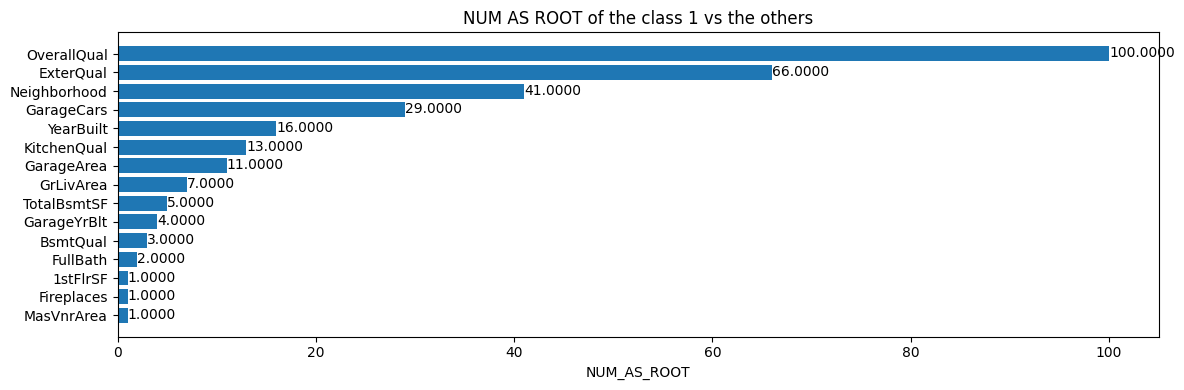

In [27]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

## Submission
Finally predict on the competition test data using the model.

In [29]:
test_file_path = "/kaggle/House_Prices/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 2s 32ms/step


,Id,SalePrice
0,1461,126120.093750
1,1462,153128.937500
2,1463,178665.703125
3,1464,182939.109375
4,1465,197613.734375


In [30]:
sample_submission_df = pd.read_csv('/kaggle/House_Prices/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/House_Prices/submission.csv', index=False)
sample_submission_df.head()

2/2 [==============================] - 0s 30ms/step


,Id,SalePrice
0,1461,126120.093750
1,1462,153128.937500
2,1463,178665.703125
3,1464,182939.109375
4,1465,197613.734375
